<a href="https://colab.research.google.com/github/SubhadipGhosh07/Topic-Modeling-on-BBC-News-articles/blob/main/Topic_Modeling_on_News_articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u>Project Title : Extraction/identification of major topics & themes discussed in news articles</u></b>

## <b>Problem Description:</b>

In this project we have to identify major themes/topics across a collection of BBC news articles. 

## <b>Data Description </b>
 We have been provided with news articles for each major segment consisting of business, entertainment, politics, sports and technology. We need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. We will be verifying whether these topics correspond to the different tags available.
 
 
### <b><u>Dataset Courtsey:</u></b>
 Publication: 
- D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.

All rights, including copyright, in the content of the original articles are owned by the BBC.


## <b>Importing Libraries</b>

In [ ]:
import numpy as np
import pandas as pd
import os
pd.set_option('max_colwidth', 150)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn-whitegrid")
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## <b>Extracting docs of BBC news articles on various agendas: </b>
* We have been given a collection of documents from BBC News
* The documents correspond to business news, sports articles, films and many more.
* We will be aggregating all the documents in a single dataset

In [ ]:
# Extracting news from business articles
entries = os.listdir(r'C:\project docs\business/')
business_l = []
for op in entries:
    with open(r'C:\project docs\business\{}'.format(op)) as f:
        business_l.append(f.read())

In [ ]:
# Extracting news from entertainment articles
ent = os.listdir(r'C:\project docs\entertainment/')
entertainment_l = []
for en in ent:
    with open(r'C:\project docs\entertainment\{}'.format(en)) as f:
        entertainment_l.append(f.read())

In [ ]:
# Extracting news from sports articles
sports = os.listdir(r'C:\project docs\sport/')
sports_l = []
for sp in sports:
    with open(r'C:\project docs\sport\{}'.format(sp)) as f:
        sports_l.append(f.read())

In [ ]:
# Extracting news from technology articles
tech = os.listdir(r'C:\project docs\tech/')
tech_l = []
for tc in tech:
    with open(r'C:\project docs\tech\{}'.format(tc)) as f:
        tech_l.append(f.read())

In [ ]:
# Extracting news from technology articles
pol = os.listdir(r'C:\project docs\politics/')
pol_l = []
for pl in pol:
    with open(r'C:\project docs\politics\{}'.format(pl)) as f:
        pol_l.append(f.read())

### <b>Aggregating the lists into a single DataFrame:</b>
* We will be creating a dataset naming it 'bbc_news' and aggregate all the previous documnets
* We will be re-sampling them to make them appear in a more random way in our dataset

In [ ]:
# ---------> Creating a dataset bbc_news 
bbc_news = pd.DataFrame()
# ---------> Aggregating all the docs together
bbc_news['Articles'] = business_l + entertainment_l + sports_l + tech_l + pol_l
bbc_news.shape

(2225, 1)

In [ ]:
# ---------> Datset formed
bbc_news.head()

,Articles
0,Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to Decembe...
1,Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head sa...
2,Yukos unit buyer faces loan claim\n\nThe owners of embattled Russian oil giant Yukos are to ask the buyer of its former production unit to pay bac...
3,High fuel prices hit BA's profits\n\nBritish Airways has blamed high fuel prices for a 40% drop in profits.\n\nReporting its results for the three...
4,Pernod takeover talk lifts Domecq\n\nShares in UK drinks and food firm Allied Domecq have risen on speculation that it could be the target of a ta...


In [ ]:
# ---------> Re-Sampling our dataset
bbc_df = bbc_news.sample(bbc_news.shape[0])
bbc_df = bbc_df.reset_index()
bbc_df.drop('index', axis =1, inplace = True)

In [ ]:
# ---------> Let's check how our final dataset looks like
bbc_df.head(10)

,Articles
0,Robinson wants dual code success\n\nEngland rugby union captain Jason Robinson has targeted dual code success over Australia on Saturday.\n\nRobin...
1,EMI shares hit by profit warning\n\nShares in music giant EMI have sunk by more than 16% after the firm issued a profit warning following disappoi...
2,Parmalat sues 45 banks over crash\n\nParmalat has sued 45 banks as it tries to reclaim money paid to banks before the scandal-hit Italian dairy co...
3,Lewis-Francis eyeing world gold\n\nMark Lewis-Francis says his Olympic success has made him determined to bag World Championship 100m gold in 2005...
4,Gardener battles to narrow win\n\nJason Gardener fought all the way to the line to narrowly claim the men's 60m title at the Norwich Union Indoor ...
5,Singer Ferguson 'facing eviction'\n\nThree Degrees star Sheila Ferguson is the favourite to be evicted from ITV's I'm A Celebrity... Get Me Out Of...
6,"Latest Opera browser gets vocal\n\nNet browser Opera 8.0, due for official release at the end of next month, will be ""the most accessible browser ..."
7,Healey targets England comeback\n\nLeicester wing Austin Healey hopes to use Sunday's return Heineken Cup clash with Wasps as a further springboar...
8,Royal couple watch nation's mood\n\nPrince Charles and Camilla Parker Bowles are awaiting the nation's reaction after announcing they are to be ma...
9,"Lloyd's of London head chides FSA\n\nThe head of Lloyd's of London, the insurance market, has criticised Britain's financial watchdog, the Financi..."


In [ ]:
# ---------> Creating a copy of our dataset
bbc_copy = bbc_df.copy()

In [ ]:
# ---------> Importing Libraries
import nltk
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
lm = WordNetLemmatizer()

## <b>Text-Preprocessing and Tokenization:</b>
* Removing Numerical values and punctuations
* Removing stop-words
* Tokenizing the words using Lemmatization
* Extracting out only the noun phrases using TextBlob

In [ ]:
def rem_unwanted(article):
    modify = re.sub("[^a-zA-Z]",' ',article) #Keeping only alphabets in our corpus
    modify = modify.lower()                  #Coonverting into lower case
    modify= ' '.join([lm.lemmatize(word) for word in modify.split() if word not in stopwords.words("english")])
    text_blob_object = TextBlob(modify)
#     choosing only the noun phrases from our corpus
    b = text_blob_object.noun_phrases
    return ' '.join(b)

In [ ]:
bbc_copy['Articles'] = bbc_copy['Articles'].apply(rem_unwanted)
bbc_copy.head()

,Articles
0,dual code success england rugby union captain jason robinson dual code success australia saturday robinson rugby league code lead england australi...
1,emi share profit warning share music giant emi sunk firm profit warning disappointing sale delay album release emi music sale year march fall year...
2,bank crash parmalat reclaim money bank scandal italian dairy company year firm debt bn euro bn bn new bos enrico bondi legal action number lender ...
3,lewis francis gold mark lewis francis olympic success bag world championship gold year maurice greene leg x relay athens top honour team gb birchf...
4,gardener battle jason gardener way line claim men title norwich union indoor trial aaa championship world champion mark findlay darren chin block ...


In [ ]:
# Storing the number of words spoken in each document
bbc_copy['Words count'] = bbc_copy['Articles'].apply(lambda x: len(list(x)))

In [ ]:
# Dataset
bbc_copy.head()

,Articles,Words count
0,dual code success england rugby union captain jason robinson dual code success australia saturday robinson rugby league code lead england australi...,704
1,emi share profit warning share music giant emi sunk firm profit warning disappointing sale delay album release emi music sale year march fall year...,715
2,bank crash parmalat reclaim money bank scandal italian dairy company year firm debt bn euro bn bn new bos enrico bondi legal action number lender ...,706
3,lewis francis gold mark lewis francis olympic success bag world championship gold year maurice greene leg x relay athens top honour team gb birchf...,359
4,gardener battle jason gardener way line claim men title norwich union indoor trial aaa championship world champion mark findlay darren chin block ...,1668


### <b>Checking Distribution of the number of terms in each document:</b>
* We will try to remove the documents having extreme values of 'words count'

Text(0.5, 1.0, 'Distribution of word counts')

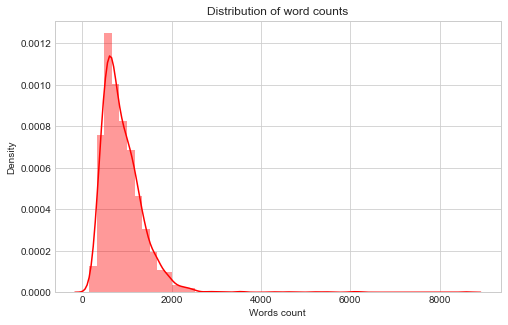

In [ ]:
# Distribution of Word counts
plt.figure(figsize = (8,5))
sns.distplot(bbc_copy['Words count'], hist = True, color = 'red')
plt.title("Distribution of word counts")

* <b>Conclusion</b>:
* Most of the documents have word counts close to 800-900. However, some articles have word counts over 3000 as well. For simplicity of our model we will be removing those articles which have a much higher word count. Let's check how many documents have such a higher word count in our dataset

In [ ]:
print("Number of articles having word count less than 400 are: {}".format((bbc_copy['Words count'] < 300).sum()))
print("Number of articles having word count greater than 3000 are: {}".format((bbc_copy['Words count'] > 3000).sum()))

Number of articles having word count less than 400 are: 31
Number of articles having word count greater than 3000 are: 10


In [ ]:
# Removing words having higher word counts(more than 3000)
bbc_copy = bbc_copy[bbc_copy['Words count'] < 3000]
bbc_copy.head()

,Articles,Words count
0,dual code success england rugby union captain jason robinson dual code success australia saturday robinson rugby league code lead england australi...,704
1,emi share profit warning share music giant emi sunk firm profit warning disappointing sale delay album release emi music sale year march fall year...,715
2,bank crash parmalat reclaim money bank scandal italian dairy company year firm debt bn euro bn bn new bos enrico bondi legal action number lender ...,706
3,lewis francis gold mark lewis francis olympic success bag world championship gold year maurice greene leg x relay athens top honour team gb birchf...,359
4,gardener battle jason gardener way line claim men title norwich union indoor trial aaa championship world champion mark findlay darren chin block ...,1668


## <b>Converting our terms into vectors (Vectorization): </b>
* We will first be using CountVectorizer(Bag of Words) to convert tokens into vectors
* We will plot the most frequent words in our dataset

In [ ]:
# Using Count Vectorizer to convert the terms into vectors

cv = CountVectorizer(ngram_range=(1, 2), min_df = 2,
                       encoding='ascii')
counts = cv.fit_transform(bbc_copy['Articles'])

In [ ]:
# Converting the sparse matrix into a dataframe
counts_df =  pd.DataFrame(counts.toarray(), columns = cv.get_feature_names())

In [ ]:
# Shape of our sparse dataset
counts_df.shape

(2215, 47582)

## <b>Counting the occurance of each term in our corpus:</b>
* Creating an empty dictionary
* Storing the term as keys and the count as values
* Updating our stopwords
* Plotting the most frequent words using a bar-plot

In [ ]:
# Creating an empty dictionary
counts_dict = {}
for ii, word in enumerate(counts_df.columns):
    counts_dict[word] = sum(counts_df[str(word)])
    word_count = [(i,count) for i,count in list(zip(counts_dict.keys(), counts_dict.values()))]

In [ ]:
# Looking at the most common words
# Sorting the occurance of each term in a descending format
sorted_counts = sorted(word_count, key = lambda x: x[1], reverse = True)
sorted_counts

[('mr', 2874),
 ('year', 2198),
 ('new', 1793),
 ('people', 1252),
 ('time', 1192),
 ('game', 1170),
 ('world', 996),
 ('government', 954),
 ('uk', 938),
 ('film', 936),
 ('company', 918),
 ('bn', 871),
 ('firm', 848),
 ('service', 785),
 ('market', 736),
 ('number', 718),
 ('labour', 693),
 ('music', 678),
 ('player', 672),
 ('bbc', 665),
 ('minister', 652),
 ('election', 644),
 ('sale', 640),
 ('show', 627),
 ('party', 624),
 ('country', 616),
 ('technology', 578),
 ('blair', 569),
 ('group', 557),
 ('day', 553),
 ('month', 550),
 ('phone', 549),
 ('plan', 546),
 ('part', 538),
 ('way', 537),
 ('good', 535),
 ('home', 534),
 ('week', 533),
 ('work', 533),
 ('england', 519),
 ('mobile', 519),
 ('european', 515),
 ('top', 512),
 ('award', 504),
 ('high', 497),
 ('tv', 485),
 ('tax', 474),
 ('british', 465),
 ('chief', 461),
 ('news', 459),
 ('report', 459),
 ('need', 449),
 ('system', 442),
 ('price', 439),
 ('director', 436),
 ('public', 435),
 ('record', 434),
 ('share', 430),
 ('ban

### <b>Updating our Stopwords:</b>
* By looking at the counts of words from the list of tuples, we have updated the stop-words
* Any word which has an occurance higher than 1500 and less than 4 have been considered stop-words

In [ ]:
add_stop_words = [words for words,count in sorted_counts if (count > 1500) or (count < 4)]
add_stop_words = add_stop_words + ['aaa','bn','aaa title', 'abc','eu','th','bn bn','common','apple', 'bn', 'blair', 'lib','mp','bb','basis mr','bee','bee gee']

Text(0, 0.5, 'Terms')

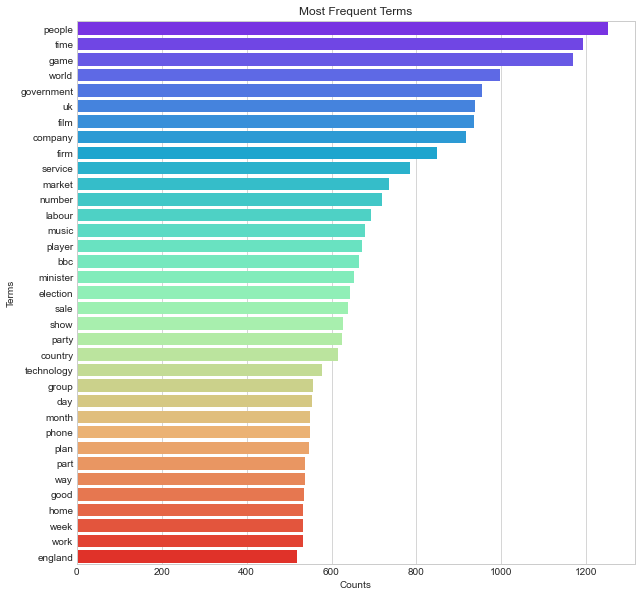

In [ ]:
# Plotting a bar plot for the most frequent terms
top_words = [word for word, count in sorted_counts[:40] if word not in add_stop_words]
count_top_words = [count for word, count in sorted_counts[:40] if word not in add_stop_words]


plt.figure(figsize = (10,10))
sns.barplot(y = top_words, x=count_top_words, palette = 'rainbow')
plt.title("Most Frequent Terms")
plt.xlabel("Counts")
plt.ylabel("Terms")


<b> Conclusion: </b>
The terms 'people', 'time', 'game', 'world' and 'government' are the words that have been spoken the most number of times in BBC.
The term 'People' has been spoken the most number of times with a frequency of over 1200, followed by 'time' and 'game' which corresponds to 1190 times and 1170 times respectively.

## <b>Updating our document-term matrix using updated stop-words:</b>
* We will be using Tfidf Vectorizer for creating the doc-term matrix
* We will be applying the updated stopwords as well
* <b>min_df:</b> (Minimum document frequency) Any term appearing in less than this threshold will not be allowed in the matrix
* <b>max_df:</b> (Maximum document frequency) Any term appearing in more than this threshold will not be allowed in the matrix
* <b>ngram_range:</b> (x,y)--->Collected words considered together as one token of length x and y

In [ ]:
# Recreating document-term matrix
# Using updated stop-words

vec = TfidfVectorizer(ngram_range=(1, 2),min_df = 0.0030,max_df = 0.60,
                       encoding='ascii', stop_words = add_stop_words)
vec_t = vec.fit_transform(bbc_copy['Articles'])
vec_df = pd.DataFrame(vec_t.toarray(), columns=vec.get_feature_names())

In [ ]:
# Shape of our doc-term matrix using tf-idf
vec_df.shape

(2215, 5647)

## <b>Topic-Modeling using Latent Dirichlet Allocation (LDA):</b>
* Will be using Latent Dirichlet Allocation for checking the latent features(topics) of our corpus
* We will be using pyLDAvis which allows a better visualization
* We will be using T-Sne for lowering down the dimensions of our feature-space
* Tuning the hyper-parameters of LDA using RandomizedSearchCV

In [ ]:
# Importing pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [ ]:
# Imporing LatentDirichletAllocation and TSNE
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Topic Modeling using Latent Dirichlet Allocation
lda = LatentDirichletAllocation(n_components = 5)
lda_model = lda.fit(vec_t)

In [ ]:
# Visualising our topics
lda_panel = pyLDAvis.sklearn.prepare(lda_model, vec_t, vec ,mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  32.417649
3       51.163364 -159.968018       2        1  24.056435
1      -73.144554   21.523815       3        1  17.268919
0      -66.410133 -110.606438       4        1  17.154340
2       54.417324   12.443444       5        1   9.102656, topic_info=          Term       Freq      Total Category  logprob  loglift
1791      film  31.000000  31.000000  Default  30.0000  30.0000
315      award  19.000000  19.000000  Default  29.0000  29.0000
2785    labour  23.000000  23.000000  Default  28.0000  28.0000
1525  election  22.000000  22.000000  Default  27.0000  27.0000
3254    mobile  15.000000  15.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
4615      side   3.320277  12.022552   Topic5  -6.0412   1.1099
4768     squad   2.818055   6.178134   Topic5  -6.2052   1.6116
1142       cup   3.189551  12.971573   Topic5  -6.0814   0.9937
726   champion   3.137016  12.594853   Topic5  -6.0980   1.0066
5581     world   3.051998  24.694734   Topic5  -6.1255   0.3058

[292 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
39        3  0.920071         actor
41        3  0.873920       actress
78        5  0.660901        agassi
99        1  0.903053       airline
109       3  0.864226         album
...     ...       ...           ...
5581      4  0.121483         world
5581      5  0.121483         world
5592      5  0.800859  world number
5638      1  0.881069         yukos
5640      5  0.802650       zealand

[460 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 1, 3])

## <b>Discussing our LDA visualisation chart:</b>
* The white bars define the overall term frequency of a particular token

* The red bars define the estimated term frequency of a particular token

* In each topic, the top 30 most relevant tokens have been used for visualization

* The relevance metric (lambda) when equal to 1, the terms are arranged according to their probability in a particular topic. Lambda when equal to zero, the tokens get arranged in the decreasing order of their respective lifts.

* Lift: ratio of a term’s probability to it’s marginal probability in the entire corpus

* We have used T-SNE as a dimensionality reduction technique to visualise the clusters form in a 2-dimensional feature space


## <b>Conclusion:</b>

* Out of the five major themes/topics that had been provided to us, our LDA (Latent Dirichlet Allocation) has correctly clustered most of the terms corresponding to a topic

* Business and Political articles constitute about 56% of the overall tokens and the rest three topics correspond to the remaining 44%

* Our LDA model works best at relevance level 0.6, correctly classifying almost 85% of the tokens in their respective clusters

* Adjusted the hyper-parameters doc_topic_prior and topic_word_prior, but for 5 topics, both corresponding to None gave the best results

